In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [2]:
#takes in the first season and the last season to be observed
#returns a list of the years formatted so it can pull from the data naming system I am using
def produceYears(start,end):
    arr = []
    for i in range(end-start+1):
        num = start + i
        year = str(num) + str(num+1)
        arr.append(year)
    return arr
        
        

In [3]:
years = produceYears(14,18)

In [4]:
#Open the file containing the data
team = 'warriors'
import plot_team_compare
responseA = []
responseB = []
for i in range(0,len(years)): 
    with open(team +years[i]+'.txt') as json_file:  
        response = json.load(json_file)
    with open(team +years[i]+ 'P.txt') as json_file:  
        response2 = json.load(json_file)
    responseA.append(response)
    responseB.append(response2)


In [5]:
reg_frames = []
post_frames = []

In [6]:
#concatenates the regular season shooting data into one group and the postseason shooting data into one group
for i in range(len(responseA)):
    reg1 = pd.DataFrame(responseA[i]['resultSets'][0]['rowSet'],columns=responseA[i]['resultSets'][0]['headers'])
    post1 = pd.DataFrame(responseB[i]['resultSets'][0]['rowSet'],columns=responseB[i]['resultSets'][0]['headers'])
    reg_frames.append(reg1)
    post_frames.append(post1)

reg = pd.concat(reg_frames)
post = pd.concat(post_frames)

In [ ]:
plot_team_compare.grantland_shotchart(post, reg)


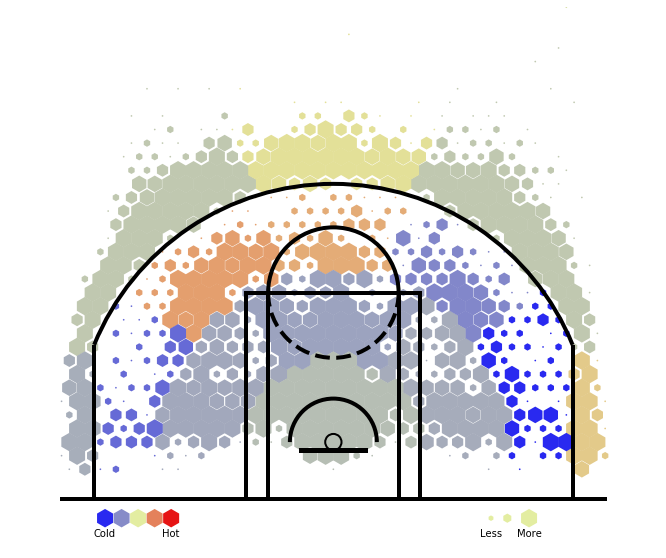

In [ ]:
RS = reg1.groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA','SHOT_MADE_FLAG']).size().unstack(fill_value=0)

RS['FGP'] = 1.0*RS.loc[:,1]/RS.sum(axis=1)

post = post1.groupby(['SHOT_ZONE_RANGE','SHOT_ZONE_AREA','SHOT_MADE_FLAG']).size().unstack(fill_value=0)

post['FGP'] = 1.0*team.loc[:,1]/team.sum(axis=1)

post_vs_regular = (team.loc[:,'FGP'] - LA.loc[:,'FGP'])*100
